In [0]:
# Demonstration of gradient descent
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# define a function f
x = y = np.linspace(-2.0, 2.0, 100)
X,Y = np.meshgrid(x,y)
f = -(np.cos(0.5*X)**2+np.cos(Y)**2)**2

# gradient of f at a point (x,y)
def compute_gradient(x,y):
    fx = 2.0*(np.cos(0.5*x)**2+np.cos(y)**2)*np.cos(0.5*x)*np.sin(0.5*x)    
    fy = 4.0*(np.cos(0.5*x)**2+np.cos(y)**2)*np.cos(y)*np.sin(y)
    return fx,fy

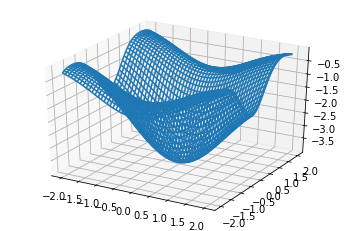

In [2]:
# plot the function as a wireframe
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, f)
plt.show()

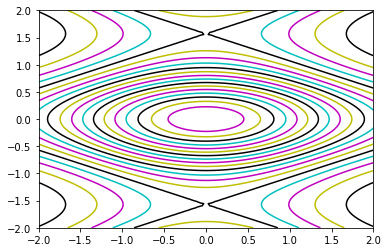

In [3]:
# plot isocontours of f
%matplotlib inline
plt.contour(X,Y,f,20,colors=['c', 'm', 'y', 'k'])

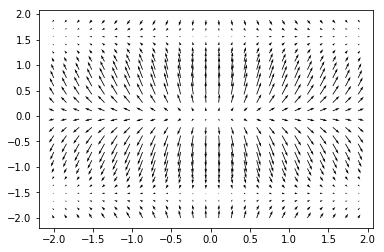

In [4]:
# plot gradient vectors
FX,FY = compute_gradient(X,Y)
%matplotlib inline
plt.quiver(X[0:100:4,0:100:4],Y[0:100:4,0:100:4],FX[0:100:4,0:100:4],FY[0:100:4,0:100:4])

In [16]:
# gradient descent algorithm
a = 1.0
b = 1.0 # initial values
step_size = 0.05
print(a,b)
nIter = 20
p = np.zeros((2,nIter+1)) # for plotting points
p[0,0] = a
p[1,0] = b
for i in range(nIter):
    # compute gradient at current point (x,y)
    fx,fy = compute_gradient(a,b) 
    # move current point in the opposite direction of the gradient
    a = a - step_size*fx
    b = b - step_size*fy
    print(a,b)
    p[0,i+1] = a
    p[1,i+1] = b

1.0 1.0
0.9553146201336346 0.903425544878436
0.9074785357271405 0.789500830985662
0.8561132279623687 0.6591287569873493
0.8012549417333099 0.5184742399245024
0.7437129612870422 0.3805369802792301
0.6851493438645941 0.2612170510586437
0.6275508365587202 0.17037743899995808
0.5724752840456193 0.10768226047867242
0.5207759472289912 0.06689201123662691
0.47278073483380556 0.04115866846233032
0.4285316811858389 0.025178687456762366
0.3879306309643512 0.015342236412425912
0.3508104217835484 0.009321011310363173
0.3169692842755565 0.005649751470554368
0.2861891292483355 0.0034180790050698964
0.2582465033711995 0.0020647684058650857
0.23291971745643744 0.0012457120522259414
0.20999362012015013 0.0007507919740718504
0.1892627414582502 0.00045212470276284904
0.17053324524315897 0.0002720822144434004


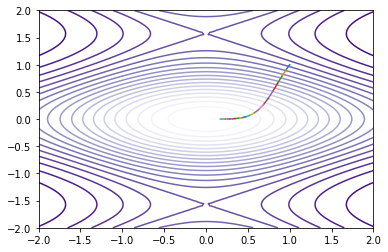

In [17]:
# movement of point by gradient descent on isocontour plot
import matplotlib.cm as cm

%matplotlib inline
plt.contour(X,Y,f,20,cmap=cm.get_cmap(name='Purples', lut=None))
for i in range(nIter+1):
    plt.plot(p[0,i:i+2],p[1,i:i+2])

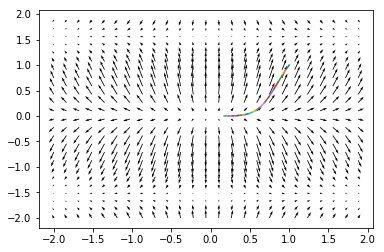

In [18]:
# movement of point by gradient descent on quiver plot
%matplotlib inline
plt.quiver(X[0:100:4,0:100:4],Y[0:100:4,0:100:4],FX[0:100:4,0:100:4],FY[0:100:4,0:100:4])
for i in range(nIter+1):
    plt.plot(p[0,i:i+2],p[1,i:i+2])